## Python statistics essential training - 02_04_cleaning

Standard imports

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [3]:
billboard = pd.read_csv('billboard.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7614: invalid start byte

In [4]:
!file billboard.csv

billboard.csv: CSV text


In [5]:
# Encoding the file
billboard = pd.read_csv('billboard.csv', encoding='latin1')

In [6]:
billboard.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
billboard.columns

Index(['year', 'artist.inverted', 'track', 'time', 'genre', 'date.entered',
       'date.peaked', 'x1st.week', 'x2nd.week', 'x3rd.week', 'x4th.week',
       'x5th.week', 'x6th.week', 'x7th.week', 'x8th.week', 'x9th.week',
       'x10th.week', 'x11th.week', 'x12th.week', 'x13th.week', 'x14th.week',
       'x15th.week', 'x16th.week', 'x17th.week', 'x18th.week', 'x19th.week',
       'x20th.week', 'x21st.week', 'x22nd.week', 'x23rd.week', 'x24th.week',
       'x25th.week', 'x26th.week', 'x27th.week', 'x28th.week', 'x29th.week',
       'x30th.week', 'x31st.week', 'x32nd.week', 'x33rd.week', 'x34th.week',
       'x35th.week', 'x36th.week', 'x37th.week', 'x38th.week', 'x39th.week',
       'x40th.week', 'x41st.week', 'x42nd.week', 'x43rd.week', 'x44th.week',
       'x45th.week', 'x46th.week', 'x47th.week', 'x48th.week', 'x49th.week',
       'x50th.week', 'x51st.week', 'x52nd.week', 'x53rd.week', 'x54th.week',
       'x55th.week', 'x56th.week', 'x57th.week', 'x58th.week', 'x59th.week',
       '

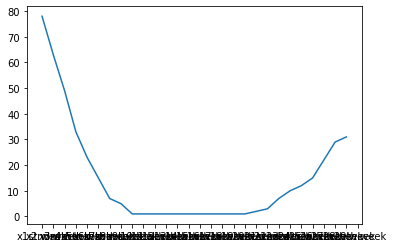

In [8]:
pp.plot(billboard.loc[0, 'x1st.week': 'x76th.week'])

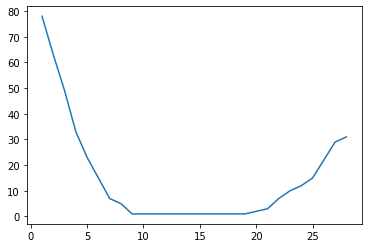

In [9]:
pp.plot(range(1, 77), billboard.loc[0, 'x1st.week': 'x76th.week'])

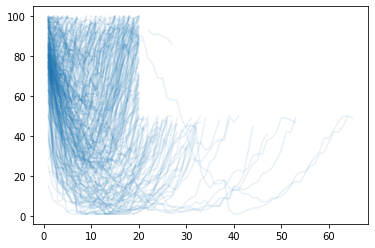

In [11]:
for index, row in billboard.iterrows():
   pp.plot(range(1, 77), row['x1st.week': 'x76th.week'], color='C0', alpha = 0.1)

In [13]:
bshort = billboard[['artist.inverted','track','time','date.entered','x1st.week','x2nd.week','x3rd.week']]

In [14]:
bshort.head()

,artist.inverted,track,time,date.entered,x1st.week,x2nd.week,x3rd.week
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,78,63.0,49.0
1,Santana,"Maria, Maria",4:18,2000-02-12,15,8.0,6.0
2,Savage Garden,I Knew I Loved You,4:07,1999-10-23,71,48.0,43.0
3,Madonna,Music,3:45,2000-08-12,41,23.0,18.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,2000-08-05,57,47.0,45.0


In [15]:
bshort.columns = ['artist','track','time','date.entered','wk1','wk2','wk3']
bshort.head()

,artist,track,time,date.entered,wk1,wk2,wk3
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,78,63.0,49.0
1,Santana,"Maria, Maria",4:18,2000-02-12,15,8.0,6.0
2,Savage Garden,I Knew I Loved You,4:07,1999-10-23,71,48.0,43.0
3,Madonna,Music,3:45,2000-08-12,41,23.0,18.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,2000-08-05,57,47.0,45.0


In [16]:
bmelt = bshort.melt(['artist','track','time','date.entered'],['wk1','wk2','wk3'],'week','rank')
bmelt.head()

,artist,track,time,date.entered,week,rank
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,wk1,78.0
1,Santana,"Maria, Maria",4:18,2000-02-12,wk1,15.0
2,Savage Garden,I Knew I Loved You,4:07,1999-10-23,wk1,71.0
3,Madonna,Music,3:45,2000-08-12,wk1,41.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,2000-08-05,wk1,57.0


In [18]:
bmelt.query('track == "Liar"')


,artist,track,time,date.entered,week,rank
66,Profyle,Liar,3:57,2000-09-16,wk1,52.0
383,Profyle,Liar,3:57,2000-09-16,wk2,32.0
700,Profyle,Liar,3:57,2000-09-16,wk3,25.0


In [19]:
bmelt[bmelt['track'] == 'Liar']

,artist,track,time,date.entered,week,rank
66,Profyle,Liar,3:57,2000-09-16,wk1,52.0
383,Profyle,Liar,3:57,2000-09-16,wk2,32.0
700,Profyle,Liar,3:57,2000-09-16,wk3,25.0


In [20]:
# Extract the integer from the week column
bmelt['week'] = bmelt['week'].apply(lambda  s: int(s[2]))

In [21]:
bmelt.head()

,artist,track,time,date.entered,week,rank
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,1,78.0
1,Santana,"Maria, Maria",4:18,2000-02-12,1,15.0
2,Savage Garden,I Knew I Loved You,4:07,1999-10-23,1,71.0
3,Madonna,Music,3:45,2000-08-12,1,41.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,2000-08-05,1,57.0


In [22]:
bmelt['date.entered'] = pd.to_datetime(bmelt['date.entered'])

In [24]:
# Add time delta
bmelt['date.entered'] [0] + pd.Timedelta('7 days')

Timestamp('2000-09-30 00:00:00')

In [25]:
# Create a new date column
bmelt['date'] = bmelt['date.entered'] + pd.Timedelta('7 days') * (bmelt['week'] - 1)

In [26]:
bmelt.head()

,artist,track,time,date.entered,week,rank,date
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,1,78.0,2000-09-23
1,Santana,"Maria, Maria",4:18,2000-02-12,1,15.0,2000-02-12
2,Savage Garden,I Knew I Loved You,4:07,1999-10-23,1,71.0,1999-10-23
3,Madonna,Music,3:45,2000-08-12,1,41.0,2000-08-12
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,2000-08-05,1,57.0,2000-08-05


In [27]:
# Drop columns
bmelt.drop(['date.entered'], axis=1, inplace=True)

In [28]:
bmelt[bmelt['track'] == 'Liar']


,artist,track,time,week,rank,date
66,Profyle,Liar,3:57,1,52.0,2000-09-16
383,Profyle,Liar,3:57,2,32.0,2000-09-23
700,Profyle,Liar,3:57,3,25.0,2000-09-30


In [29]:
bfinal = bmelt[['artist','track','time','date','week','rank']]
bfinal.sort_values(['artist','track'],inplace=True)

In [30]:
bfinal.head()

,artist,track,time,date,week,rank
246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-02-26,1,87.0
563,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-03-04,2,82.0
880,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-03-11,3,72.0
287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,2000-09-02,1,91.0
604,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,2000-09-09,2,87.0


In [32]:
tracks = bfinal[['artist','track','time']].drop_duplicates()
tracks.head()

,artist,track,time
246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22
287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15
24,3 Doors Down,Kryptonite,3:53
193,3 Doors Down,Loser,4:24
69,504 Boyz,Wobble Wobble,3:35


In [33]:
# Create an id column with the row index values
tracks.index.name = 'id'
# Reset Index
tracksid = tracks.reset_index()
tracksid.head

<bound method NDFrame.head of       id            artist                                              track  \
0    246             2 Pac                Baby Don't Cry (Keep Ya Head Up II)   
1    287           2Ge+her  The Hardest Part Of Breaking Up (Is Getting Ba...   
2     24      3 Doors Down                                         Kryptonite   
3    193      3 Doors Down                                              Loser   
4     69          504 Boyz                                      Wobble Wobble   
..   ...               ...                                                ...   
312  254       Yankee Grey                               Another Nine Minutes   
313  277  Yearwood, Trisha                                    Real Live Woman   
314  251   Ying Yang Twins                            Whistle While You Twurk   
315  314     Zombie Nation                                      Kernkraft 400   
316   15   matchbox twenty                                               Bent  

In [34]:
# Join DataFrame
pd.merge(tracksid, bfinal, on=['track', 'artist', 'time']).head()

,id,artist,track,time_x,time_y,date,week,rank
0,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,4:22,2000-02-26,1,87.0
1,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,4:22,2000-03-04,2,82.0
2,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,4:22,2000-03-11,3,72.0
3,287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,3:15,2000-09-02,1,91.0
4,287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,3:15,2000-09-09,2,87.0


In [35]:
tidy = pd.merge(tracksid, bfinal, on=['track', 'artist', 'time']).drop(['track', 'artist', 'time'], axis=1)
tidy.head()

,id,date,week,rank
0,246,2000-02-26,1,87.0
1,246,2000-03-04,2,82.0
2,246,2000-03-11,3,72.0
3,287,2000-09-02,1,91.0
4,287,2000-09-09,2,87.0


In [36]:
tidy.loc[tidy[tidy.week == 1]['rank'].idxmin()]

id                        1
date    2000-02-12 00:00:00
week                      1
rank                   15.0
Name: 756, dtype: object

In [ ]:
tracksid.query('id == 1')